In [3]:
#import libraries and setup sql cursor
import sqlite3
import pandas as pd
from bs4 import BeautifulSoup
import requests 
import matplotlib.pyplot as plt
import seaborn as sb

conn = sqlite3.connect('data/movies.db')
cur = conn.cursor()

## Get bom and rotten tomatoe data and merge them into one with overlapping values(inner)

In [4]:
#get rotten tomatoe data
rt_movies = pd.DataFrame(cur.execute("SELECT * FROM rotten_tomatoes_movies").fetchall())
rt_movies.columns = [i[0] for i in cur.description]

In [5]:
#get bom movie data
bom_movie_gross = pd.DataFrame(cur.execute("SELECT foreign_gross, domestic_gross, title from bom_movie_gross").fetchall())
bom_movie_gross.columns = [i[0] for i in cur.description]
bom_movie_gross = bom_movie_gross[bom_movie_gross["foreign_gross"].notna()]

In [6]:
#create merged dataframe of rotten tomatoe and bom movies
bom_gross_rt_genre = rt_movies.join(bom_movie_gross, how="inner")

In [7]:
#drop na values from rotten tomatoe and bom movie merge
bom_gross_rt_genre.dropna(inplace=True)

In [8]:
not_list_format =  bom_gross_rt_genre

In [9]:
#sc
not_list_format.head()

,idx,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,...,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,foreign_gross,domestic_gross,title
0,0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,149.0,Spilled,53.0,254421.0,43,73,76,652000000,415000000.0,Toy Story 3
1,1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,142.0,Upright,64.0,11574.0,44,123,19,691300000,334200000.0,Alice in Wonderland (2010)
2,2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,24.0,Spilled,53.0,14684.0,2,16,8,664300000,296000000.0,Harry Potter and the Deathly Hallows Part 1
3,3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,54.0,Upright,97.0,105386.0,6,54,0,535700000,292600000.0,Inception
4,4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,27.0,Upright,74.0,68918.0,5,24,3,513900000,238700000.0,Shrek Forever After


## get list of unique genres

# Get data based off a certain genre from bom and rotten tomatoe merge

In [21]:
#function makes new databse with just a certain column
def get_genre_db(db, genre):
    return db[db["genres"].str.contains(genre)]

In [22]:
action = get_genre_db(bom_gross_rt_genre, "Action")

In [23]:
#reformat genres data go make it a list of items
def get_unique_genres(raw_genres):
    all_genres = []
    genres = raw_genres.str.replace("&", ",")
    genres = raw_genres.str.split(',')
    for item in genres:
        if item != None:
            for genre in item:
                all_genres.append(genre)
    unique_genres = set(all_genres)
    unique_genres = set([(genre.strip()) for genre in unique_genres])
    return unique_genres
get_unique_genres(bom_gross_rt_genre["genres"])

{'Action & Adventure',
 'Animation',
 'Art House & International',
 'Classics',
 'Comedy',
 'Cult Movies',
 'Documentary',
 'Drama',
 'Faith & Spirituality',
 'Horror',
 'Kids & Family',
 'Musical & Performing Arts',
 'Mystery & Suspense',
 'Romance',
 'Science Fiction & Fantasy',
 'Special Interest',
 'Sports & Fitness',
 'Television',
 'Western'}

In [24]:
def get_unique_content_ratings(raw_content_ratings):
    all_content_ratings = []
    for rating in raw_content_ratings:
        all_content_ratings.append(rating)
    unique_content_ratings = set(all_content_ratings)
    return unique_content_ratings
unique_content_ratings = get_unique_content_ratings(action["content_rating"])

In [72]:
def get_unique_people(raw_people):
    all_people = []
    clumped_people = []
    clumped_people = raw_people.str.split(",")
    for row in clumped_people:
        if row != None:
            for director in row:
                all_people.append(director)
    unique_people = set(all_people)
    unique_people = [(director.strip()) for director in unique_people]
    unique_people = set(unique_people)
    return unique_people

In [74]:
unique_directors = get_unique_people(action["directors"])

In [95]:
action[action["actors"].str.contains("Queen")]["actors"]

2858    Martin Sheen, Marlon Brando, Robert Duvall, Fr...
462     Steve McQueen, Ali MacGraw, Al Lettieri, Sally...
438     Sam J. Jones, Melody Anderson, Topol, Max von ...
Name: actors, dtype: object

### gross by audience rating

In [26]:
action.sort_values("audience_rating", ascending=False, inplace=True)

<ipython-input-26-35017429592b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action.sort_values("audience_rating", ascending=False, inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Audience rating(/100)'),
 Text(0.5, 0, 'Domestic Gross(*100mil)'),
 Text(0.5, 1.0, 'Audience rating compared to Domestic Gross')]

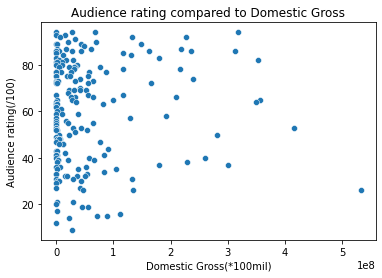

In [27]:
gross_rating = sb.scatterplot(action["domestic_gross"], action["audience_rating"])
gross_rating.set(ylabel ="Audience rating(/100)", xlabel = "Domestic Gross(*100mil)", title ='Audience rating compared to Domestic Gross')

In [28]:
#sc
action[action["directors"].str.contains("Tim Kirkby")]

,idx,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,...,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,foreign_gross,domestic_gross,title
2323,2323,m/action_point,Action Point,D.C. is the crackpot owner of Action Point -- ...,Ouch.,R,"Action & Adventure, Comedy",Tim Kirkby,"Johnny Knoxville, John Altschuler, Dave Krinsky","Johnny Knoxville, Aidan Whytock, Joe Vaz, Leon...",...,48.0,Spilled,26.0,667.0,16,7,41,523900000.0,532200000.0,Rogue One: A Star Wars Story


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Audience rating(/100)'),
 Text(0.5, 0, 'Domestic Gross(*100mil)'),
 Text(0.5, 1.0, 'some title')]

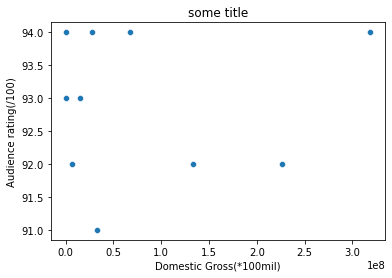

In [29]:
top_gross_rating = sb.scatterplot(action["domestic_gross"][0:10], action["audience_rating"][0:10])
top_gross_rating.set(ylabel ="Audience rating(/100)", xlabel = "Domestic Gross(*100mil)", title ='some title')

### content rating by audience rating

In [30]:
cr_ar = action.groupby(['content_rating'])['audience_rating'].mean().sort_values(ascending=False)

In [31]:
cr_ar

content_rating
NR       85.800000
G        71.909091
PG       61.617647
R        61.443182
PG-13    49.879310
Name: audience_rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Audience rating of 100'),
 Text(0.5, 0, 'Content Rating'),
 Text(0.5, 1.0, 'Audience rating based on content rating')]

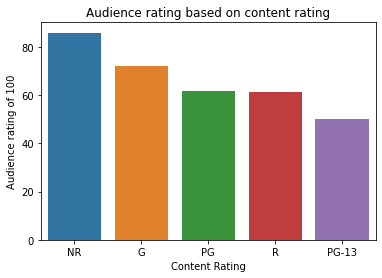

In [32]:
cr_ar_sb = sb.barplot(list(cr_ar.keys()), cr_ar)
cr_ar_sb.set(ylabel ="Audience rating of 100", xlabel = "Content Rating", title ='Audience rating based on content rating')

### top audience rating means by director

In [33]:
action.groupby(['directors'])['audience_rating'].mean().sort_values(ascending=False)

directors
Francis Ford Coppola    94.0
James Cameron           94.0
Christopher Nolan       94.0
Andrei Tarkovsky        93.0
Akira Kurosawa          93.0
                        ... 
Jeremiah S. Chechik     15.0
Kenneth Johnson (I)     15.0
David Hogan             14.0
Ronald Neame            12.0
York Alec Shackleton     9.0
Name: audience_rating, Length: 176, dtype: float64

In [34]:
#sc
len(action)

201

In [35]:
def groupby_unformatted_column(df, unique, unique_category, aggregate_category):
    #unique is a list of unique values of the unique category
    return_list = []
    occurances_list = []
    label_list = []
    return_dict = {}
    for item in unique:
        frame = df[df[unique_category].str.contains(item)]
        aggregate = round(frame[aggregate_category].mean(), 1)
        occurance = len(frame[aggregate_category])
        occurances_list.append(occurance)
        return_list.append(aggregate)
    return_dict = {unique_category: list(unique), aggregate_category: return_list, "occurances": occurances_list}
    df = pd.DataFrame(return_dict)
    df["labels"] = df[unique_category].astype(str) + " (" + df["occurances"].astype(str) + ")"
    df.sort_values(aggregate_category, inplace=True, ascending = False)
    return df


In [36]:
rating_director_df = groupby_unformatted_column(action, unique_directors, "directors", "audience_rating")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [37]:
unique_directors[35]

'Bruce Beresford'

In [38]:
rating_director_df.drop_duplicates(subset="directors", inplace=True)

In [39]:
rating_director_df

,directors,audience_rating,occurances,labels
119,James Cameron,94.0,1,James Cameron (1)
88,Francis Ford Coppola,94.0,1,Francis Ford Coppola (1)
189,Christopher Nolan,94.0,1,Christopher Nolan (1)
56,Andrei Tarkovsky,93.0,1,Andrei Tarkovsky (1)
181,Akira Kurosawa,93.0,1,Akira Kurosawa (1)
...,...,...,...,...
39,Steven C. Miller,17.0,1,Steven C. Miller (1)
164,Jeremiah S. Chechik,15.0,1,Jeremiah S. Chechik (1)
186,David Hogan,14.0,1,David Hogan (1)
171,York Alec Shackleton,9.0,1,York Alec Shackleton (1)


In [56]:
#can be used for labels
top_directors_by_rating = rating_director_df[rating_director_df["occurances"]> 2]

In [57]:
#sc
top_directors_by_rating

,directors,audience_rating,occurances,labels
75,Terrence Malick,76.0,3,Terrence Malick (3)
122,Michael Bay,73.2,4,Michael Bay (4)
41,Walter Hill,64.0,3,Walter Hill (3)
7,Roland Emmerich,55.0,3,Roland Emmerich (3)
12,Dominic Sena,42.7,3,Dominic Sena (3)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Terrence Malick (3)'),
 Text(0, 1, 'Michael Bay (4)'),
 Text(0, 2, 'Walter Hill (3)'),
 Text(0, 3, 'Roland Emmerich (3)'),
 Text(0, 4, 'Dominic Sena (3)')]

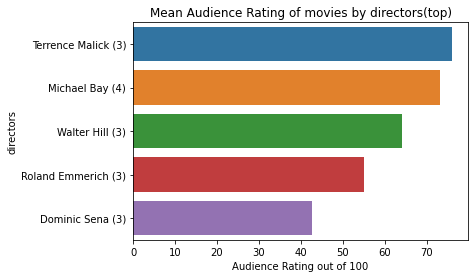

In [58]:
tdbar = sb.barplot(top_directors_by_rating["audience_rating"], top_directors_by_rating["directors"], orient = 'h')
tdbar.set(xlabel="Audience Rating out of 100", title="Mean Audience Rating of movies by directors(top)")
tdbar.set_yticklabels(top_directors_by_rating["labels"])

### top audience rating by actor

In [76]:
unique_actors = get_unique_people(action["actors"])

In [91]:
unique_actors

{'Thorston Manderlay',
 'Leon Greene',
 'Jim Haynie',
 'Dominic Alexander',
 'Sterling Holloway',
 'Nicholas Tse',
 'Bruce Pierson',
 'William Marlowe',
 'Nadim Sawalha',
 'Tom Sizemore',
 'Zach Poole',
 'Mina Ghousi',
 "David O'Hara",
 'Claire Johnson',
 'John Shepherd',
 'Nancy Wolfe',
 'Ryan Wulff',
 'Wylie Watson',
 'Liam Cunningham',
 'Geshe Yeshi Tsultrim',
 'Jim Farley',
 'Marcelo Tubert',
 'Marion Leonard',
 'Michael Bublé',
 'Gina Gagnon',
 'Stephen E. Miller',
 'George Clooney',
 'Kim Nicholas',
 'Timothy Patrick Quill',
 'Carl Weintraub',
 'Jennifer Alden',
 'Jon Cuthbert',
 'Jill Jarmyn',
 'Eugene Bicknell',
 'Nolan North',
 'Chris Ellis',
 'Adrienne Barbeau',
 'Mekhi Phifer',
 'Danny Costa',
 'Robert Pine',
 'Sullivan Stapleton',
 'Sierra McCormick',
 'Michael Shillo',
 'Andree Fafard',
 'Charles Nauu',
 'Jade Pawluk',
 'James Johnson',
 'Frances McDormand',
 'Niall MacGinnis',
 'Howard Velasco',
 'Marty Rosen',
 'Surachai Jantimatorn',
 'Michael Madsen',
 'George Ross',
 

In [77]:
rating_by_actors = groupby_unformatted_column(action, unique_actors, "actors", "audience_rating")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [87]:
rating_by_actors = rating_by_actors[rating_by_actors["occurances"]>0][0:15]

In [88]:
rating_by_actors.head(3)

,actors,audience_rating,occurances,labels
5935,Michael Caine,88.3,3,Michael Caine (3)
3965,Marc McClure,86.3,3,Marc McClure (3)
640,Christopher Lloyd,83.0,3,Christopher Lloyd (3)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='audience_rating', ylabel='labels'>

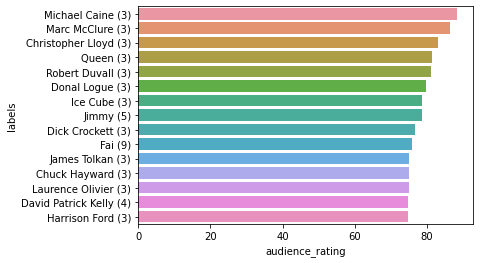

In [89]:
sb.barplot(rating_by_actors["audience_rating"], rating_by_actors["labels"])

### Top Grossing means by director

#### top directors by mean Foreign Gross

In [61]:
fgross_by_director = groupby_unformatted_column(action, unique_directors, "actors", "foreign_gross")

In [43]:
fgross_director_df[0:10]

NameError: name 'fgross_director_df' is not defined

In [44]:
#sc
top_directors_by_fgross

NameError: name 'top_directors_by_fgross' is not defined

In [45]:
tdbfg = sb.barplot(top_directors_by_fgross["foreign_gross"], top_directors_by_fgross["director"], orient = 'h')
tdbfg.set(xlabel = "Foreign gross(*100mil)", title="Mean Foreign Gross of Movies by director(top)")
tdbfg.set_yticklabels(top_directors_by_fgross["labels"])

NameError: name 'top_directors_by_fgross' is not defined

In [46]:
dgross_director_df = groupby_unformatted_column(action, unique_directors, "directors", "domestic_gross")

In [ ]:
top_directors_by_dgross = dgross_director_df[0:10]

In [ ]:
#sc
top_directors_by_dgross

#### top directors by mean Gross domestic 

In [13]:
tdbdg = sb.barplot(top_directors_by_dgross["domestic_gross"], top_directors_by_dgross["directors"], orient = 'h')
tdbdg.set(xlabel = "Domestic gross(*100mil)", title="Mean Domestic Gross of Movies by director(top)")
tdbdg.set_yticklabels(top_directors_by_dgross["labels"])

NameError: name 'top_directors_by_dgross' is not defined

### top directors by domestic gross/audience rating

In [ ]:
#add new column to action that divides dgross by audience rating
action["dgross_and_rating"] = action["domestic_gross"]/ action["audience_rating"]

In [14]:
dgross_rating_director_df = groupby_unformatted_column(action, unique_directors, "directors", "dgross_and_rating")

NameError: name 'groupby_unformatted_column' is not defined

In [ ]:
top_dgrd = dgross_rating_director_df[0:10]

In [ ]:
tdbdgar = sb.barplot(top_dgrd["dgross_and_rating"], top_dgrd["directors"], orient = 'h')
tdbdgar.set(xlabel = "Domestic gross/audience rating", title="Directors with Highest Mean Domestic Gross / Audience Rating Scpre")
tdbdgar.set_yticklabels(top_dgrd["labels"])

In [15]:
#turn string values within foreign gross column into na and drop them
not_list_format["foreign_gross"] = not_list_format["foreign_gross"].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

### Genre by domestic gross Revenue

In [16]:
genre_dgross_df = groupby_unformatted_column(not_list_format, unique_genres, "genres", "domestic_gross")

NameError: name 'groupby_unformatted_column' is not defined

In [17]:
genre_dgross_df

NameError: name 'genre_dgross_df' is not defined

In [ ]:
genre_dgross_df = genre_dgross_df[genre_dgross_df["genres"] != 'Cult Movies']
genre_dgross_df = genre_dgross_df[genre_dgross_df["genres"] != 'Television']
genre_dgross_df = genre_dgross_df[genre_dgross_df["genres"] != 'Classics']
genre_dgross_df = genre_dgross_df[genre_dgross_df["genres"] != 'Art House & International']

In [ ]:
genre_dgross_df.sort_values("domestic_gross", ascending=False, inplace=True)

In [ ]:
genre_dgross_df

NameError: name 'genre_dgross_df' is not defined

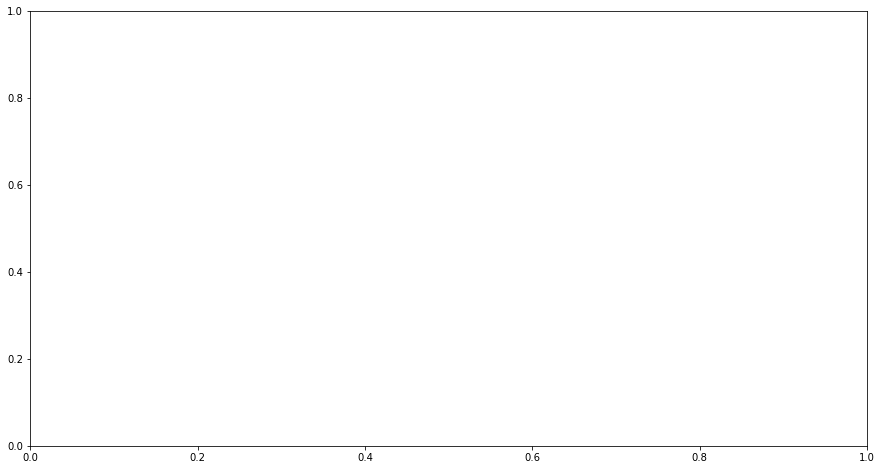

In [18]:
#make graph of mean gross by genre
fig, ax = plt.subplots(figsize= (15, 8))
ax.barh(genre_dgross_df["genres"], genre_dgross_df["domestic_gross"])
ax.set_title("Domestic Gross Revenue Average by Genre")
ax.set_yticklabels(genre_dgross_df["labels"])
ax.set_xlabel("Domestic Gross(x10 Million)",fontsize=15)
ax.set_ylabel("Genre",fontsize=15)

### Genre by audience rating

In [19]:
genre_rating_df = groupby_unformatted_column(not_list_format, unique_genres, "genres", "audience_rating")

NameError: name 'groupby_unformatted_column' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Classics (110)'),
 Text(0, 1, 'Sports & Fitness (9)'),
 Text(0, 2, 'Art House & International (98)'),
 Text(0, 3, 'Documentary (38)'),
 Text(0, 4, 'Special Interest (27)'),
 Text(0, 5, 'Cult Movies (5)'),
 Text(0, 6, 'Musical & Performing Arts (44)'),
 Text(0, 7, 'Faith & Spirituality (6)'),
 Text(0, 8, 'Romance (130)'),
 Text(0, 9, 'Western (12)'),
 Text(0, 10, 'Drama (568)'),
 Text(0, 11, 'Television (5)'),
 Text(0, 12, 'Animation (40)'),
 Text(0, 13, 'Comedy (330)'),
 Text(0, 14, 'Kids & Family (72)'),
 Text(0, 15, 'Action & Adventure (201)'),
 Text(0, 16, 'Mystery & Suspense (242)'),
 Text(0, 17, 'Science Fiction & Fantasy (129)'),
 Text(0, 18, 'Horror (115)')]

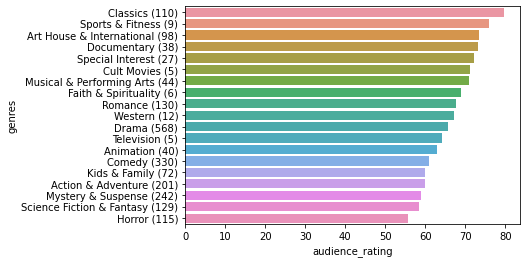

In [510]:
gbar = sb.barplot(genre_rating_df["audience_rating"], genre_rating_df["genres"], orient="h")
gbar.set_yticklabels(genre_rating_df["labels"])